# Basics of Biomedical Data Analysis
# Data Challenge
Elsa Ollikainen & Ilmari Lehtinen

## Importing packages

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Importing data

In [497]:
# Dataset loading
df_tr = pd.read_csv(r'train_set.csv', index_col=0)
df_tst = pd.read_csv(r'test_set.csv', index_col=0)

# Size of the dataset
print('There are %d training samples' %df_tr.shape[0])
print('There are %d test samples' %df_tst.shape[0])

# First 5 rows from the training dataset
df_tr.head(5)

There are 400 training samples
There are 851 test samples


,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
938,1,71.0,24.903581,0,Caucasian,M,165.00,Other Hospital,admit,Cardiac ICU,0.000000,0,67.8,3.0,108.0,203.01,0,0.0,0.4,26.0,2.4,0.30,1.0,1.0,0.0,1.0,187.0,114.0,27.3,1.0,49.0,38.0,38.0,134.0,7.415,34.0,132.0,35.6,1.0,7.00,79.0,29.0,96.0,29.0,96.0,29.0,105.0,72.0,226.0,53.0,106.0,51.0,106.0,51.0,32.0,18.0,100.0,99.0,225.0,103.0,171.0,90.0,171.0,90.0,37.10000,35.60000,3.2,3.0,0.4,0.4,26.0,23.0,8.4,7.7,2.4,2.05,187.0,154.0,21.0,21.0,11.6,9.5,34.0,27.3,1.19,1.19,1.3,1.1,142.0,142.00,4.5,3.6,137.0,132.0,7.00,7.00,38.0,32.0,7.498,7.415,177.0,134.0,446.666667,446.666667,0.60,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
126,0,43.0,26.132296,0,Asian,F,147.30,Accident & Emergency,admit,Med-Surg ICU,0.006944,0,56.7,2.6,113.0,501.03,0,0.0,1.2,6.0,0.6,0.21,4.0,6.0,0.0,5.0,106.0,101.0,24.0,0.0,194.0,29.0,29.0,114.0,7.410,30.0,137.0,36.5,0.0,16.80,139.0,42.0,74.0,53.0,74.0,53.0,101.0,56.0,142.0,59.0,86.0,63.0,86.0,63.0,30.0,0.0,100.0,93.0,149.0,83.0,110.0,80.0,110.0,80.0,37.16964,36.50292,2.6,2.6,1.2,1.2,6.0,6.0,8.0,7.4,0.6,0.60,149.0,106.0,18.0,17.0,8.6,7.1,28.1,24.0,1.50,1.50,1.4,1.4,154.0,154.00,4.0,2.4,138.0,137.0,16.80,16.80,29.0,29.0,7.410,7.410,114.0,114.0,542.857143,542.857143,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
790,1,70.0,29.972841,0,Caucasian,F,165.10,Accident & Emergency,admit,Med-Surg ICU,0.215972,0,81.7,2.0,113.0,502.01,0,0.0,0.4,65.0,3.5,0.57,3.0,5.0,0.0,1.0,174.0,60.0,24.0,1.0,164.0,36.6,36.6,86.0,7.321,29.0,134.0,34.5,1.0,5.28,76.0,66.0,90.0,47.0,90.0,47.0,77.0,60.0,111.0,100.0,104.0,60.0,104.0,60.0,29.0,13.0,100.0,50.0,165.0,150.0,163.0,80.0,163.0,80.0,36.80000,34.50000,2.0,2.0,0.4,0.4,65.0,62.0,7.1,6.9,3.5,3.20,174.0,125.0,19.0,18.8,11.9,8.2,36.6,24.0,1.84,1.84,4.7,2.0,232.0,193.00,5.3,3.3,140.0,134.0,5.57,5.28,39.0,31.5,7.321,7.245,163.0,61.6,250.769231,150.877193,0.32,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
829,1,68.0,39.474838,0,Caucasian,F,149.90,Floor,admit,Med-Surg ICU,12.781944,0,88.7,2.9,113.0,501.02,0,0.0,7.2,34.0,2.3,0.92,4.0,6.0,0.0,4.0,237.0,178.0,16.2,1.0,40.0,43.6,43.6,217.0,7.113,43.0,152.0,32.9,1.0,0.90,84.0,29.0,63.0,29.0,63.0,29.0,177.0,61.0,121.0,49.0,71.0,36.0,71.0,36.0,41.0,6.0,100.0,83.0,199.0,87.0,108.0,58.0,108.0,58.0,38.90000,33.60000,2.9,2.9,7.2,7.2,34.0,29.0,7.2,7.1,2.3,1.70,237.0,60.0,15.0,7.0,11.2,5.3,33.0,16.1,1.97,1.54,14.7,3.5,27.0,18.55,6.7,4.0,152.0,140.0,1.20,0.90,49.3,19.2,7.381,6.890,309.0,102.0,235.869565,206.000000,0.96,0.93,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Sepsis,Cardiovascular
116,0,50.0,22.595316,0,Caucasian,F,167.64,Accident & Emergency,admit,Med-Surg ICU,0.000000,0,63.5,2.3,113.0,501.05,0,0.0,0.5,44.0,2.8,0.50,2.0,5.0,0.0,3.0,183.0,132.0,26.9,1.0,147.0,28.0,28.0,155.0,7.320,51.0,133.0,37.5,1.0,6.10,80.0,77.0,89.0,63.0,89.0,63.0,113.0,96.0,106.0,99.0,108.0,79.0,108.0,79.0,30.0,26.0,98.0,86.0,148.0,131.0,136.0,109.0,136.0,109.0,38.20000,37.60000,2.4,2.3,0.5,0.4,44.0,37.0,8.1,7.7,2.8,2.40,183.0,132.0,14.0,10.0,9.6,9.6,26.9,26.9,3.10,2.60,3.0,1.1,107.0,107.00,3.4,3.0,134.0,133.0,6.10,6.10,28.0,27.0,7.320,7.210,155.0,72.0,310.000000,180.000000,0.53,0.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular


## Cleaning the data

Removing all the columns with only zero entries and editing the column f103 to have only lowercase letters, so that the categories are correctly later. 

In [498]:
indexes_tr = df_tr.columns[(df_tr == 0).all()]
df_tr = df_tr.drop(indexes_tr, axis=1)

indexes_tst = df_tst.columns[(df_tst == 0).all()]
df_tst = df_tst.drop(indexes_tr, axis=1)

df_tr['f103'] = df_tr['f103'].str.lower()
df_tst['f103'] = df_tst['f103'].str.lower()


df_tr.head(5)
df_tst.head(5)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
721,55.0,30.879688,1,Caucasian,M,182.9,Operating Room / Recovery,admit,MICU,0.536111,103.30,4.4,213.0,1405.02,1,0.0,3.5,14.0,0.80,0.36,4.0,6.0,5.0,98.0,117.0,33.9,0.0,120.0,49.9,49.9,129.3,7.25,7.0,137.0,36.0,1.0,7.30,85.0,63.0,89.0,58.0,89.0,58.0,106.0,67.0,107.0,81.0,100.0,64.0,100.0,64.0,24.0,7.0,100.0,90.0,151.0,119.0,133.0,83.0,133.0,83.0,36.7,36.0,4.4,4.2,3.5,3.5,10.0,10.0,8.5,8.3,0.82,0.80,160.0,109.0,23.0,23.0,11.5,10.9,34.1,34.1,1.48,1.48,3.12,3.12,180.0,180.0,5.2,4.39,140.0,138.0,7.30,7.30,49.9,40.7,7.32,7.25000,145.1,129.3,414.571429,359.166667,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,gastrointestinal
1243,25.0,23.250046,0,Caucasian,M,177.8,Accident & Emergency,admit,Cardiac ICU,0.070139,73.50,2.9,118.0,604.02,0,0.0,0.5,10.0,0.78,0.35,2.0,3.0,1.0,92.0,135.0,24.6,1.0,184.0,24.0,24.0,142.0,7.56,38.0,138.0,39.1,1.0,8.60,181.0,26.0,82.0,41.0,82.0,41.0,134.0,84.0,184.0,53.0,105.0,53.0,105.0,53.0,32.0,0.0,100.0,98.0,184.0,88.0,153.0,72.0,153.0,72.0,39.1,36.3,2.9,2.9,0.5,0.5,10.0,10.0,8.1,8.1,0.78,0.78,137.0,92.0,19.0,19.0,9.0,9.0,24.6,24.6,1.70,1.70,4.00,3.60,79.0,79.0,3.2,3.20,138.0,138.0,8.60,8.60,24.0,24.0,7.56,7.55786,142.0,142.0,405.714286,405.714286,0.09,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,trauma
1067,20.0,26.949412,1,Caucasian,M,188.0,Accident & Emergency,admit,Neuro ICU,0.268056,95.25,2.5,207.0,1602.02,1,0.0,3.1,15.0,0.94,0.70,4.0,6.0,5.0,102.0,117.0,28.0,1.0,51.0,42.0,42.0,257.0,7.35,14.0,138.0,36.8,1.0,8.90,89.0,39.0,103.0,32.0,103.0,32.0,131.0,64.0,120.0,54.0,122.0,48.0,122.0,48.0,29.0,0.0,100.0,84.0,210.0,85.0,192.0,95.0,192.0,95.0,38.4,36.8,3.1,2.5,3.1,1.2,15.0,15.0,7.7,7.7,0.94,0.94,102.0,102.0,31.0,31.0,11.8,9.4,34.6,27.0,1.20,1.20,5.10,1.20,249.0,200.0,4.0,4.00,138.0,138.0,14.30,8.90,44.0,40.0,7.44,7.35000,257.0,59.0,367.142857,196.666667,0.04,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,trauma
901,68.0,38.208359,0,Caucasian,M,187.9,Operating Room / Recovery,admit,Neuro ICU,0.004167,134.90,2.9,119.0,601.06,0,0.0,1.3,26.0,1.27,1.00,1.0,1.0,1.0,162.0,127.0,20.6,1.0,40.0,48.1,48.1,360.0,7.27,38.0,139.0,35.1,1.0,5.90,80.0,30.0,89.0,34.0,89.0,34.0,127.0,66.0,90.0,38.0,100.0,38.0,100.0,38.0,38.0,15.0,100.0,92.0,139.0,55.0,144.0,51.0,144.0,51.0,37.3,35.1,2.9,2.9,1.3,1.3,26.0,17.0,8.6,7.4,1.27,1.18,162.0,105.0,25.0,21.0,9.0,7.1,25.1,20.6,1.78,1.33,5.60,2.00,97.0,74.0,4.9,3.50,142.0,139.0,10.30,5.90,60.1,30.4,7.48,7.10000,360.0,93.2,410.000000,233.000000,0.40,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,trauma
1107,60.0,37.037037,0,Caucasian,M,180.0,Accident & Emergency,admit,CCU-CTICU,0.049306,120.00,2.7,113.0,501.05,0,0.0,2.6,37.0,1.31,0.40,1.0,4.0,1.0,208.0,115.0,35.6,0.0,47.0,65.0,65.0,91.0,7.31,5.0,138.0,37.1,0.0,12.64,37.0,13.0,93.0,38.0,93.0,38.0,107.0,85.0,38.0,17.0,97.0,47.0,97.0,47.0,26.0,12.0,100.0,87.0,71.0,23.0,134.0,76.0,134.0,76.0,38.1,37.1,2.7,2.7,2.6,2.6,29.0,25.0,8.1,7.7,1.31,1.23,208.0,101.0,30.0,28.0,13.5,10.7,35.6,35.6,1.80,1.80,3.50,3.10,163.0,163.0,4.4,4.10,142.0,138.0,12.64,12.64,65.0,48.0,7.43,7.31000,97.0,91.0,227.500000,215.555556,0.34,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,cardiovascular


## Encoding categorical variables

In [499]:
categorical_features = [features for features in df_tr.columns if df_tr[features].dtype=='O']
categorical_features

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'f102',
 'f103']

In [500]:
from sklearn.preprocessing import LabelEncoder
# Create a new DataFrame with the same information as the uploaded one
df_tr_le = df_tr.copy()

le = {}

df_tr_le.head(5)
# Code the categorical features in the new DataFrame
for cc in categorical_features:
  le[cc] = LabelEncoder()
  df_tr_le[cc] = le[cc].fit_transform(df_tr[cc])
  #df_tst_le[cc] = le[cc].fit_transform(df_tst[cc])
  if cc == 'f102':
    classes102 = le[cc].classes_
  elif cc == 'f103':
    classes103 = le[cc].classes_
  print(cc+' classes:')
  print(le[cc].classes_)

li = [0, 1, 2, 3, 4, 5 ,6,7,8,9]
le_dict2 = dict(zip(classes102, li))
le_dict3 = dict(zip(classes103, li))
le_dict2['Hematological'] = 10
le_dict3['haematologic'] = 8


df_tst2 = df_tst.replace({'f102':le_dict2, 'f103': le_dict3})
df_tst2.head(5)

df_tst_le = df_tst2.copy()

categorical_features2 = [features for features in df_tst2.columns if df_tst2[features].dtype=='O']

for cc in categorical_features2:
  le[cc] = LabelEncoder()
  df_tst_le[cc] = le[cc].fit_transform(df_tst[cc])



ethnicity classes:
['African American' 'Asian' 'Caucasian' 'Hispanic' 'Native American'
 'Other/Unknown']
gender classes:
['F' 'M']
icu_admit_source classes:
['Accident & Emergency' 'Floor' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU']
icu_stay_type classes:
['admit' 'readmit' 'transfer']
icu_type classes:
['CCU-CTICU' 'CSICU' 'CTICU' 'Cardiac ICU' 'MICU' 'Med-Surg ICU'
 'Neuro ICU' 'SICU']
f102 classes:
['Cardiovascular' 'Gastrointestinal' 'Genitourinary' 'Gynecological'
 'Metabolic' 'Musculoskeletal/Skin' 'Neurological' 'Respiratory' 'Sepsis'
 'Trauma']
f103 classes:
['cardiovascular' 'gastrointestinal' 'metabolic' 'neurologic'
 'renal/genitourinary' 'respiratory' 'trauma' 'undefined diagnoses']


In [441]:
df_tr_le.head(5)

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
938,1,71.0,24.903581,0,2,1,165.00,3,0,3,0.000000,67.8,3.0,108.0,203.01,0,0.0,0.4,26.0,2.4,0.30,1.0,1.0,1.0,187.0,114.0,27.3,1.0,49.0,38.0,38.0,134.0,7.415,34.0,132.0,35.6,1.0,7.00,79.0,29.0,96.0,29.0,96.0,29.0,105.0,72.0,226.0,53.0,106.0,51.0,106.0,51.0,32.0,18.0,100.0,99.0,225.0,103.0,171.0,90.0,171.0,90.0,37.10000,35.60000,3.2,3.0,0.4,0.4,26.0,23.0,8.4,7.7,2.4,2.05,187.0,154.0,21.0,21.0,11.6,9.5,34.0,27.3,1.19,1.19,1.3,1.1,142.0,142.00,4.5,3.6,137.0,132.0,7.00,7.00,38.0,32.0,7.498,7.415,177.0,134.0,446.666667,446.666667,0.60,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5
126,0,43.0,26.132296,0,1,0,147.30,0,0,5,0.006944,56.7,2.6,113.0,501.03,0,0.0,1.2,6.0,0.6,0.21,4.0,6.0,5.0,106.0,101.0,24.0,0.0,194.0,29.0,29.0,114.0,7.410,30.0,137.0,36.5,0.0,16.80,139.0,42.0,74.0,53.0,74.0,53.0,101.0,56.0,142.0,59.0,86.0,63.0,86.0,63.0,30.0,0.0,100.0,93.0,149.0,83.0,110.0,80.0,110.0,80.0,37.16964,36.50292,2.6,2.6,1.2,1.2,6.0,6.0,8.0,7.4,0.6,0.60,149.0,106.0,18.0,17.0,8.6,7.1,28.1,24.0,1.50,1.50,1.4,1.4,154.0,154.00,4.0,2.4,138.0,137.0,16.80,16.80,29.0,29.0,7.410,7.410,114.0,114.0,542.857143,542.857143,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0
790,1,70.0,29.972841,0,2,0,165.10,0,0,5,0.215972,81.7,2.0,113.0,502.01,0,0.0,0.4,65.0,3.5,0.57,3.0,5.0,1.0,174.0,60.0,24.0,1.0,164.0,36.6,36.6,86.0,7.321,29.0,134.0,34.5,1.0,5.28,76.0,66.0,90.0,47.0,90.0,47.0,77.0,60.0,111.0,100.0,104.0,60.0,104.0,60.0,29.0,13.0,100.0,50.0,165.0,150.0,163.0,80.0,163.0,80.0,36.80000,34.50000,2.0,2.0,0.4,0.4,65.0,62.0,7.1,6.9,3.5,3.20,174.0,125.0,19.0,18.8,11.9,8.2,36.6,24.0,1.84,1.84,4.7,2.0,232.0,193.00,5.3,3.3,140.0,134.0,5.57,5.28,39.0,31.5,7.321,7.245,163.0,61.6,250.769231,150.877193,0.32,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0
829,1,68.0,39.474838,0,2,0,149.90,1,0,5,12.781944,88.7,2.9,113.0,501.02,0,0.0,7.2,34.0,2.3,0.92,4.0,6.0,4.0,237.0,178.0,16.2,1.0,40.0,43.6,43.6,217.0,7.113,43.0,152.0,32.9,1.0,0.90,84.0,29.0,63.0,29.0,63.0,29.0,177.0,61.0,121.0,49.0,71.0,36.0,71.0,36.0,41.0,6.0,100.0,83.0,199.0,87.0,108.0,58.0,108.0,58.0,38.90000,33.60000,2.9,2.9,7.2,7.2,34.0,29.0,7.2,7.1,2.3,1.70,237.0,60.0,15.0,7.0,11.2,5.3,33.0,16.1,1.97,1.54,14.7,3.5,27.0,18.55,6.7,4.0,152.0,140.0,1.20,0.90,49.3,19.2,7.381,6.890,309.0,102.0,235.869565,206.000000,0.96,0.93,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8,0
116,0,50.0,22.595316,0,2,0,167.64,0,0,5,0.000000,63.5,2.3,113.0,501.05,0,0.0,0.5,44.0,2.8,0.50,2.0,5.0,3.0,183.0,132.0,26.9,1.0,147.0,28.0,28.0,155.0,7.320,51.0,133.0,37.5,1.0,6.10,80.0,77.0,89.0,63.0,89.0,63.0,113.0,96.0,106.0,99.0,108.0,79.0,108.0,79.0,30.0,26.0,98.0,86.0,148.0,131.0,136.0,109.0,136.0,109.0,38.20000,37.60000,2.4,2.3,0.5,0.4,44.0,37.0,8.1,7.7,2.8,2.40,183.0,132.0,14.0,10.0,9.6,9.6,26.9,26.9,3.10,2.60,3.0,1.1,107.0,107.00,3.4,3.0,134.0,133.0,6.10,6.10,28.0,27.0,7.320,7.210,155.0,72.0,310.000000,180.000000,0.53,0.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0


In [442]:
df_tst_le.head(5)

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
721,55.0,30.879688,1,2,1,182.9,2,0,4,0.536111,103.30,4.4,213.0,1405.02,1,0.0,3.5,14.0,0.80,0.36,4.0,6.0,5.0,98.0,117.0,33.9,0.0,120.0,49.9,49.9,129.3,7.25,7.0,137.0,36.0,1.0,7.30,85.0,63.0,89.0,58.0,89.0,58.0,106.0,67.0,107.0,81.0,100.0,64.0,100.0,64.0,24.0,7.0,100.0,90.0,151.0,119.0,133.0,83.0,133.0,83.0,36.7,36.0,4.4,4.2,3.5,3.5,10.0,10.0,8.5,8.3,0.82,0.80,160.0,109.0,23.0,23.0,11.5,10.9,34.1,34.1,1.48,1.48,3.12,3.12,180.0,180.0,5.2,4.39,140.0,138.0,7.30,7.30,49.9,40.7,7.32,7.25000,145.1,129.3,414.571429,359.166667,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1243,25.0,23.250046,0,2,1,177.8,0,0,3,0.070139,73.50,2.9,118.0,604.02,0,0.0,0.5,10.0,0.78,0.35,2.0,3.0,1.0,92.0,135.0,24.6,1.0,184.0,24.0,24.0,142.0,7.56,38.0,138.0,39.1,1.0,8.60,181.0,26.0,82.0,41.0,82.0,41.0,134.0,84.0,184.0,53.0,105.0,53.0,105.0,53.0,32.0,0.0,100.0,98.0,184.0,88.0,153.0,72.0,153.0,72.0,39.1,36.3,2.9,2.9,0.5,0.5,10.0,10.0,8.1,8.1,0.78,0.78,137.0,92.0,19.0,19.0,9.0,9.0,24.6,24.6,1.70,1.70,4.00,3.60,79.0,79.0,3.2,3.20,138.0,138.0,8.60,8.60,24.0,24.0,7.56,7.55786,142.0,142.0,405.714286,405.714286,0.09,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,6
1067,20.0,26.949412,1,2,1,188.0,0,0,6,0.268056,95.25,2.5,207.0,1602.02,1,0.0,3.1,15.0,0.94,0.70,4.0,6.0,5.0,102.0,117.0,28.0,1.0,51.0,42.0,42.0,257.0,7.35,14.0,138.0,36.8,1.0,8.90,89.0,39.0,103.0,32.0,103.0,32.0,131.0,64.0,120.0,54.0,122.0,48.0,122.0,48.0,29.0,0.0,100.0,84.0,210.0,85.0,192.0,95.0,192.0,95.0,38.4,36.8,3.1,2.5,3.1,1.2,15.0,15.0,7.7,7.7,0.94,0.94,102.0,102.0,31.0,31.0,11.8,9.4,34.6,27.0,1.20,1.20,5.10,1.20,249.0,200.0,4.0,4.00,138.0,138.0,14.30,8.90,44.0,40.0,7.44,7.35000,257.0,59.0,367.142857,196.666667,0.04,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,6
901,68.0,38.208359,0,2,1,187.9,2,0,6,0.004167,134.90,2.9,119.0,601.06,0,0.0,1.3,26.0,1.27,1.00,1.0,1.0,1.0,162.0,127.0,20.6,1.0,40.0,48.1,48.1,360.0,7.27,38.0,139.0,35.1,1.0,5.90,80.0,30.0,89.0,34.0,89.0,34.0,127.0,66.0,90.0,38.0,100.0,38.0,100.0,38.0,38.0,15.0,100.0,92.0,139.0,55.0,144.0,51.0,144.0,51.0,37.3,35.1,2.9,2.9,1.3,1.3,26.0,17.0,8.6,7.4,1.27,1.18,162.0,105.0,25.0,21.0,9.0,7.1,25.1,20.6,1.78,1.33,5.60,2.00,97.0,74.0,4.9,3.50,142.0,139.0,10.30,5.90,60.1,30.4,7.48,7.10000,360.0,93.2,410.000000,233.000000,0.40,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,6
1107,60.0,37.037037,0,2,1,180.0,0,0,0,0.049306,120.00,2.7,113.0,501.05,0,0.0,2.6,37.0,1.31,0.40,1.0,4.0,1.0,208.0,115.0,35.6,0.0,47.0,65.0,65.0,91.0,7.31,5.0,138.0,37.1,0.0,12.64,37.0,13.0,93.0,38.0,93.0,38.0,107.0,85.0,38.0,17.0,97.0,47.0,97.0,47.0,26.0,12.0,100.0,87.0,71.0,23.0,134.0,76.0,134.0,76.0,38.1,37.1,2.7,2.7,2.6,2.6,29.0,25.0,8.1,7.7,1.31,1.23,208.0,101.0,30.0,28.0,13.5,10.7,35.6,35.6,1.80,1.80,3.50,3.10,163.0,163.0,4.4,4.10,142.0,138.0,12.64,12.64,65.0,48.0,7.43,7.31000,97.0,91.0,227.500000,215.555556,0.34,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0


## Data split

In [501]:
# Input data
X_train = df_tr_le[df_tr_le.columns[1:]]
# Output data
y_train = df_tr_le[df_tr_le.columns[0]]

## Analysis


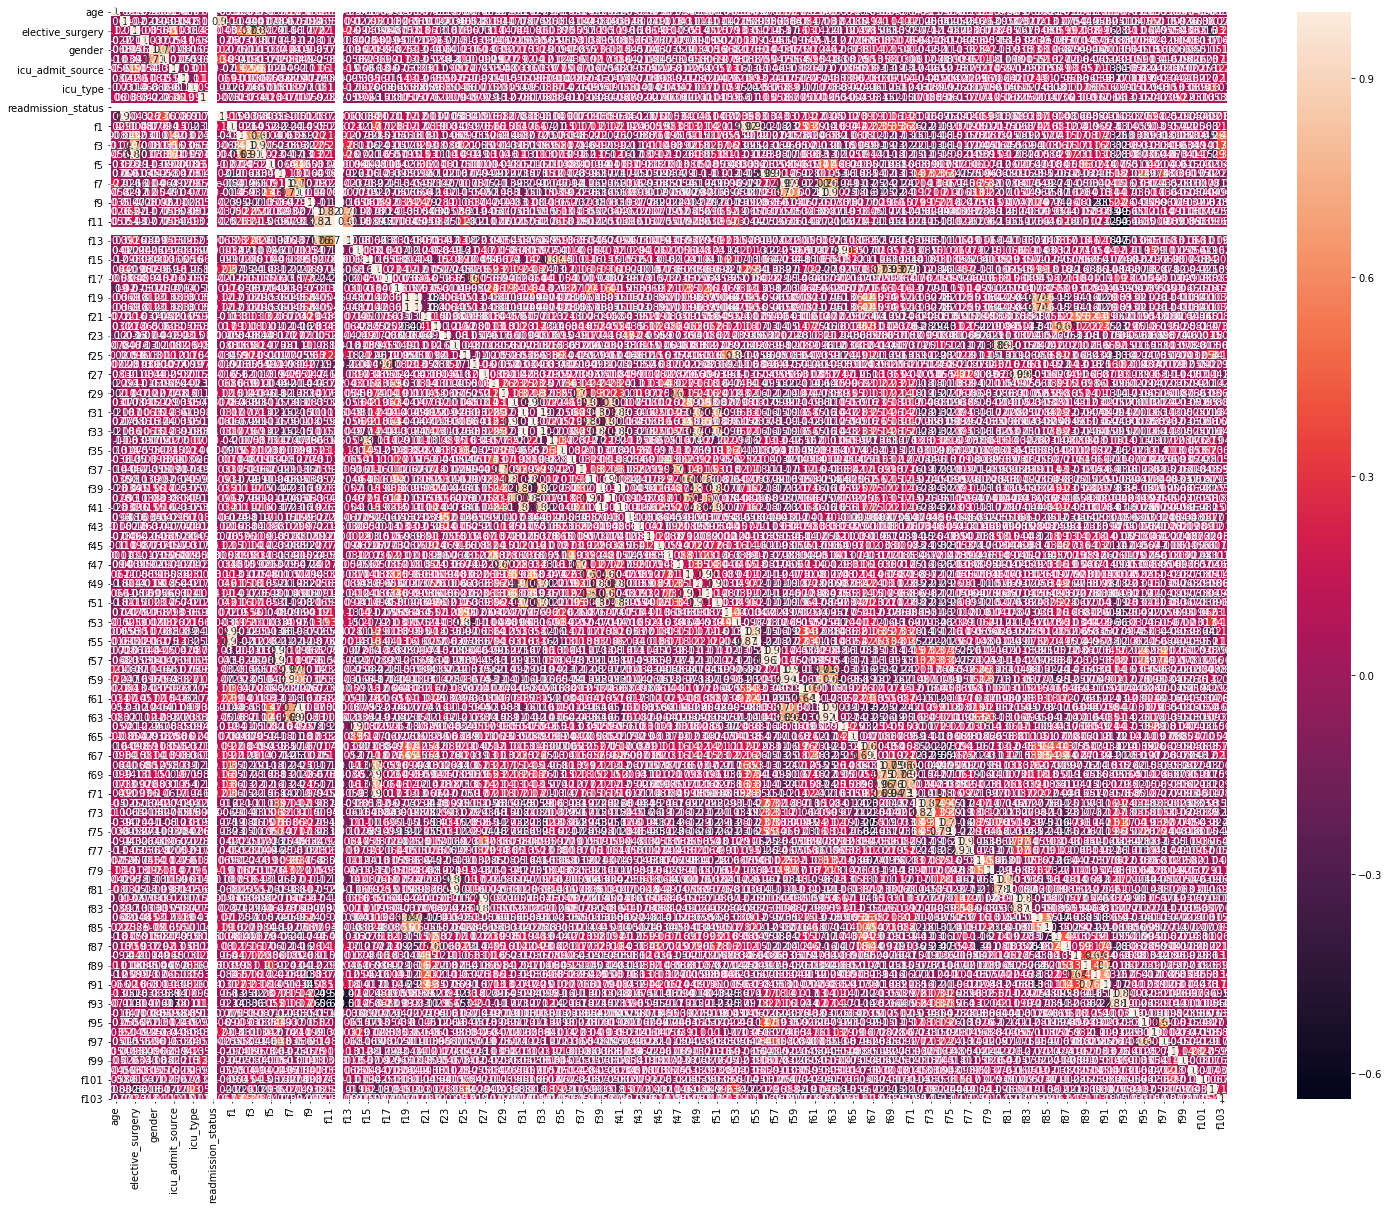

In [7]:
fig = plt.figure(figsize=(25, 20))
sns.heatmap(X_train.corr(), annot=True)

## Scaling the data

In [483]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

test_scaled = sc.fit_transform(df_tst_le)

## Implementing PCA to see how many components are wanted

Eigenvalues:
[1.10881653e+01 7.53774816e+00 5.67711069e+00 5.34878022e+00
 5.06959425e+00 4.31709093e+00 3.90632881e+00 3.63031644e+00
 3.25910610e+00 3.03672910e+00 2.66158557e+00 2.59938477e+00
 2.49863708e+00 2.25556012e+00 2.21955960e+00 2.09547117e+00
 1.87041508e+00 1.74847908e+00 1.69618610e+00 1.67140610e+00
 1.56018385e+00 1.50730367e+00 1.44791542e+00 1.41228532e+00
 1.38486960e+00 1.30212174e+00 1.22664498e+00 1.16247551e+00
 1.09926890e+00 1.06904452e+00 1.05539736e+00 1.00770685e+00
 9.92231298e-01 9.41935495e-01 8.93556683e-01 8.71450473e-01
 8.45475919e-01 7.93406149e-01 7.56058735e-01 7.20428850e-01
 7.07133275e-01 6.70901929e-01 6.69163247e-01 6.11969473e-01
 5.95110581e-01 5.67534647e-01 5.64771982e-01 5.43408991e-01
 5.31202319e-01 4.95114798e-01 4.58468726e-01 4.44266424e-01
 4.34129812e-01 4.13417545e-01 4.00783247e-01 3.70387010e-01
 3.63962345e-01 3.43859846e-01 3.31405907e-01 3.19903334e-01
 3.18653800e-01 3.05960506e-01 2.81394253e-01 2.68384398e-01
 2.57643337

Text(0, 0.5, 'Explained variance (%)')

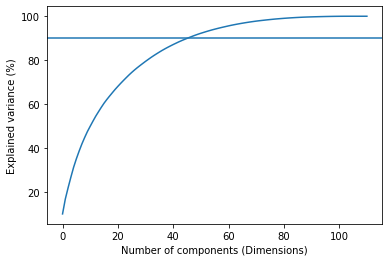

In [398]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.axhline(y = 90, linestyle = '-')
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [484]:
#from sklearn.decomposition import PCA
#%matplotlib qt
#from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=40)
pca_data = pca.fit_transform(X_scaled)
pca_test_data = pca.fit_transform(test_scaled)
X_pca = pd.DataFrame(pca_data)
X_tst_pca = pd.DataFrame(pca_test_data)
#fig = plt.figure(figsize= (5,5))
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2])



## Logistic regression model

In [515]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train2, y_test = train_test_split(X_train, y_train, test_size=0.20, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear', max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train2)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values



In [516]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train2, 
                                                 clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Train accuracy: 0.89
Test accuracy: 0.68


## Testing with the K-fold cross validation

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear', max_iter=2500)
#results = cross_val_score(model, X_scaled, y_train, cv=kfold)


#print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

for train_index, test_index in kfold.split(X_scaled):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

[0.70149254 0.7761194  0.8358209  0.71641791 0.66666667 0.65151515]
Accuracy: 72.467% (6.367%)


## K-nearest neighbors

In [404]:
from sklearn.neighbors import KNeighborsClassifier

# Create train and test split
#
X_train2, X_test, y_train2, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=42)
#
# Feature Scaling using StandardScaler
#
#sc = StandardScaler()
#sc.fit(X_train2)
#X_train_std = sc.transform(X_train2)
#X_test_std = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train2, y_train2)

print('Training accuracy score: %.3f' % knn.score(X_train2, y_train2))
print('Test accuracy score: %.3f' % knn.score(X_test, y_test))

#y_pred = knn.predict(y_train2)


Training accuracy score: 0.822
Test accuracy score: 0.562


## Decision tree

In [405]:
from sklearn.tree import DecisionTreeClassifier

X_train2, X_test, y_train2, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train2, y_train2)

print('Training accuracy score: %.3f' % clf.score(X_train2, y_train2))
print('Test accuracy score: %.3f' % clf.score(X_test, y_test))

Training accuracy score: 1.000
Test accuracy score: 0.625


## Support vector machine

In [406]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

X_train2, X_test, y_train2, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=42)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train2, y_train2)

print('Training accuracy score: %.3f' % clf.score(X_train2, y_train2))
print('Test accuracy score: %.3f' % clf.score(X_test, y_test))

Training accuracy score: 0.922
Test accuracy score: 0.613


In [494]:
# Store the predicted values in a new DataFrame
# using the test indexes
df_pred = pd.DataFrame({'hospital_death': y_pred}, index = df_tst_le.index)
df_pred.head(10)

,hospital_death
Id,
721,0
1243,0
1067,0
901,1
1107,0
1217,0
682,1
712,1
701,0


In [495]:
# Store the csv file with the submission
df_pred.to_csv('LR_encoded_submission.csv')